In [1]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを少なくします
# 汎化能力を低くなるので過学習が起こりやすくなる
x_train = x_train[:300]
t_train = t_train[:300]

networks = {}
# dropoutの比重を変えて比べてみます
dropout_rations = [0.5, 0.2, 0]

for ration in dropout_rations:
    use_dropout = True if ration != 0 else False
    networks[ration] = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, use_dropout=use_dropout, dropout_ration=ration)

In [3]:
train_acc_dict = {}
test_acc_dict = {}
def train():
    for key, network in networks.items():
        train_acc_dict[key] = []
        test_acc_dict[key] = []
        trainer = Trainer(network, x_train, t_train, x_test, t_test,epochs=301, mini_batch_size=100, optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=False)
        trainer.train()
        train_acc_dict[key] = trainer.train_acc_list
        test_acc_dict[key] = trainer.test_acc_list

In [4]:
train()

In [5]:
def plot_graph():
    index = 1
    markers = {'train': 'o', 'test': 's'}
    plt.figure(figsize=(14,8))
    for key in networks:
        title = "used_dropout:" + str(key) if key != 0 else "not_used_dropout:" + str(key)
        plt.subplot(1, 3, index)
        plt.title(title)
        train_acc_list = train_acc_dict[key]
        test_acc_list = test_acc_dict[key]
        x = np.arange(len(train_acc_list))
        plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
        plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.ylim(0, 1.0)
        plt.legend(loc='lower right')
        index += 1

    plt.show()

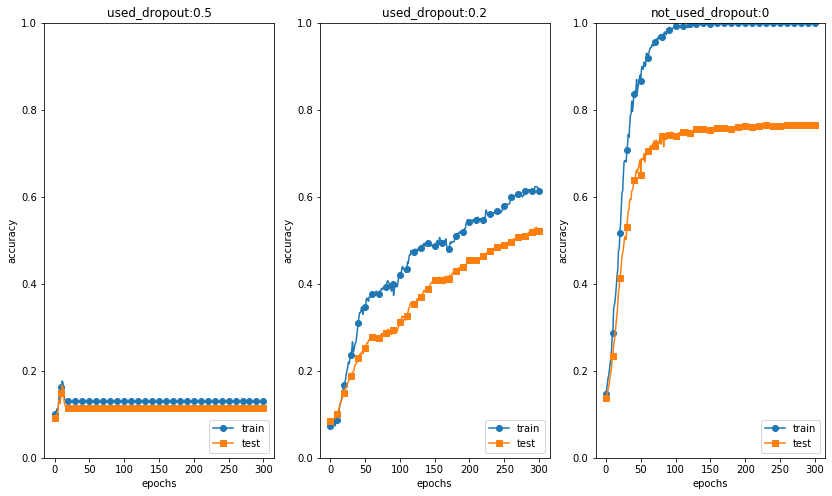

In [6]:
plot_graph()

ドロップアウトの比重が0.5のとき学習が進んでいないのは何故か。
- パラメータの数がこの比重と比べて少なすぎる
- それによって各ノードがドロップアウトし過ぎて損失関数が小さくなりパラメータを更新できない？